In [11]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  8 00:00:06 2020

@author: ekshe
"""


import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import datetime



#Import the data
#path = 'c:/users/ekshe/nfl/nfl-analysis/'
df = pd.read_csv( 'nfl_betting_df.csv')
df['spread_result'] = df.apply(lambda row: row.score_home - row.score_away if not row.home_favorite \
                               else row.score_away - row.score_home , axis =1)
df['total_score'] = df.score_away + df.score_home
df = df[df.over_under_line.notna()][['spread_favorite', 'spread_result', 'total_score', 'over_under_line', 'schedule_season']]

df = df[df.schedule_season > 2001]
df['high_total'] = df.over_under_line > 43


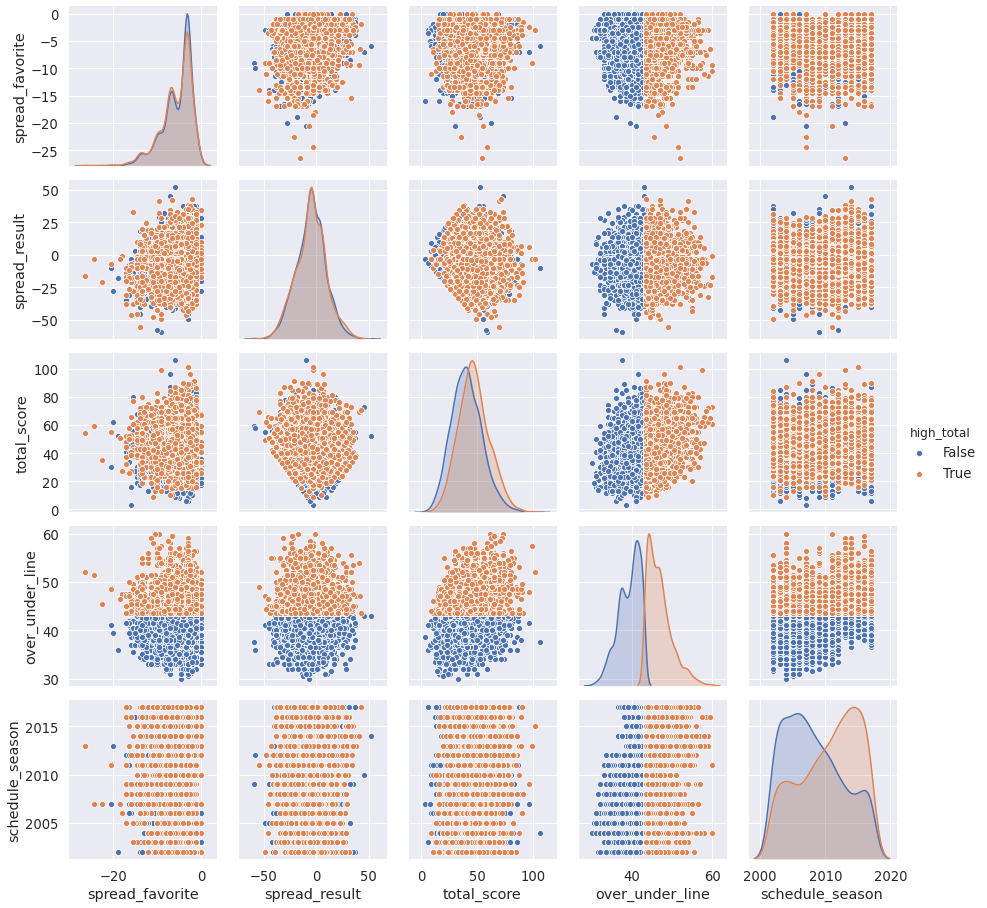

In [16]:
sns.set(font_scale= 1.2)
sns.pairplot(df, hue = 'high_total')


seasonal_ou = df.pivot_table(values = ['over_under_line', 'total_score'], index = 'schedule_season', aggfunc = [np.mean, np.median, max, min])
#seasonal_ou.columns = seasonal_ou.columns.get_level_values(0)
# Close games probablity distrubtion 


df['total_range' ] =pd.qcut(df.over_under_line, 4, labels = ['low', 'low_mid', 'high_mid', 'high'])
near_three = df[df.spread_favorite > -5]

#print (df.total_range)
distribution = near_three.pivot_table(values = 'total_score', index = ['spread_result', 'total_range'], aggfunc= len)
distribution.columns = distribution.columns.get_level_values(0)
distribution.columns= ['size']
#print (distribution.sort_values(by = ['size'], ascending = False).iloc[:20, :].sort_values(by = 'spread_result'))
close_dist= pd.DataFrame(np.round(near_three.spread_result.value_counts()/len(near_three) * 100, 2))
close_dist.columns = ['chance_percent']
close_dist = close_dist[(close_dist.index > -7.5) & (close_dist.index < 7.5)]

#print (close_dist)
#print (df.over_under_line.value_counts().iloc[:30])
#sns.regplot(df.total_score, df.spread_favorite)

#sns.distplot(df.total_score)




/home/jovyan/binder
